In [50]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Load the Dataset

In [51]:
# Load the dataset
df = pd.read_csv("Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")

# Display first 5 rows
df.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


#### Dataset Info

In [52]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [53]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")


exercise: ['low' 'high' 'medium' 'none']
sugar_intake: ['medium' 'high' 'low']
smoking: ['yes' 'no']
alcohol: ['yes' 'no']
married: ['yes' 'no']
profession: ['office_worker' 'teacher' 'artist' 'farmer' 'driver' 'engineer' 'student'
 'doctor']
health_risk: ['high' 'low']


#### Data Preprocessing

In [54]:
# Check missing values
print(df.isnull().sum())

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64


In [55]:
# Check how many duplicate rows exist
df.duplicated().sum()

0

###  Dataset Summary

- **Total Rows:** 5,000  
- **Total Columns:** 21  
- **Missing Values:** None  
- **Duplicate Rows:** None  

**Feature Categories:**
- **Demographic Features**
  - age
  - height
  - weight
  - marital status
  - profession
  
- **Lifestyle Features**
  - exercise level
  - sleep duration
  - sugar intake
  - smoking
  - alcohol consumption
  
- **Derived Feature**
  - bmi (calculated from height and weight)


### Exploratory Data Analysis (EDA)

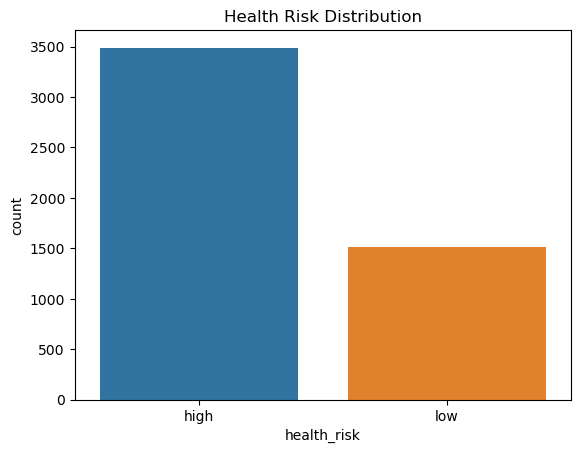

In [56]:
# Target Variable Analysis

sns.countplot(x='health_risk', data=df)
plt.title('Health Risk Distribution')
plt.show()


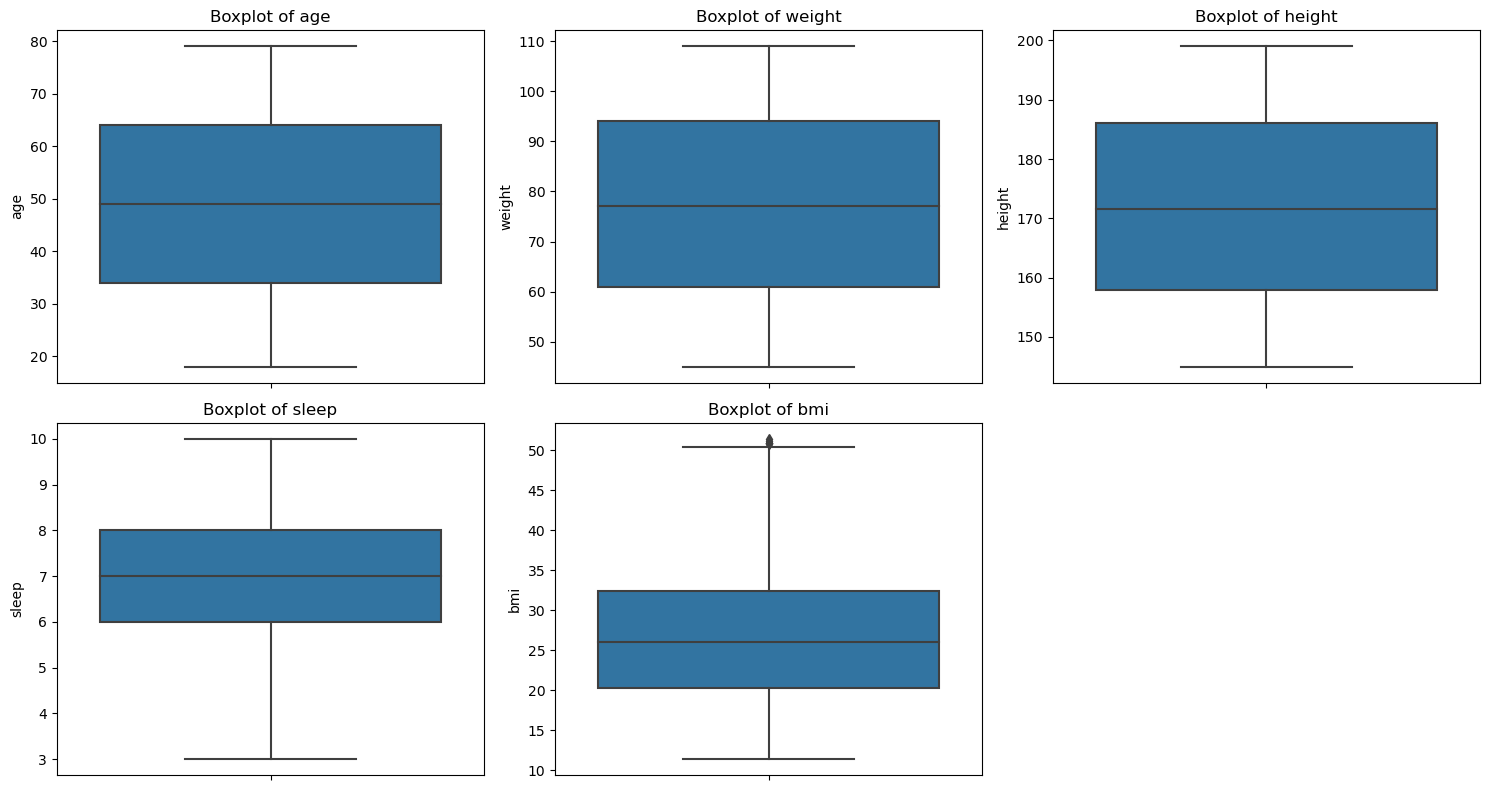

In [57]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [58]:
col = 'bmi'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"{col} outlier limits: {lower_limit:.2f} to {upper_limit:.2f}")
print("Number of outliers:", df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0])

df[(df[col] < lower_limit) | (df[col] > upper_limit)].head()


bmi outlier limits: 2.15 to 50.55
Number of outliers: 6


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
544,40,107,145,high,7.3,high,no,no,no,office_worker,50.9,high
2814,64,107,145,low,8.2,medium,no,no,no,engineer,50.9,high
3153,30,109,146,medium,6.5,medium,no,no,yes,student,51.1,low
3964,78,107,145,medium,7.6,medium,no,yes,yes,doctor,50.9,high
4708,40,108,145,low,7.5,high,no,no,yes,doctor,51.4,high


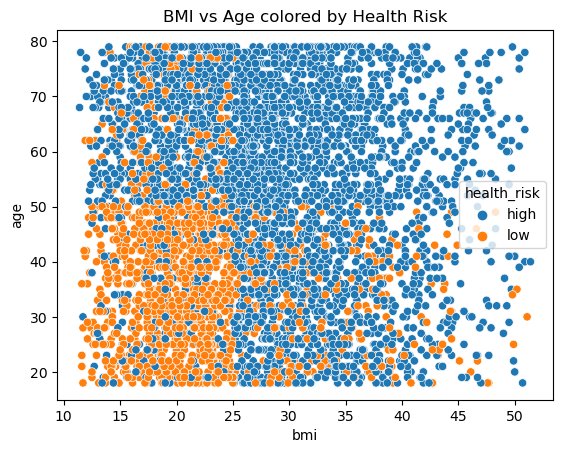

In [59]:
sns.scatterplot(x='bmi', y='age', hue='health_risk', data=df)
plt.title('BMI vs Age colored by Health Risk')
plt.show()


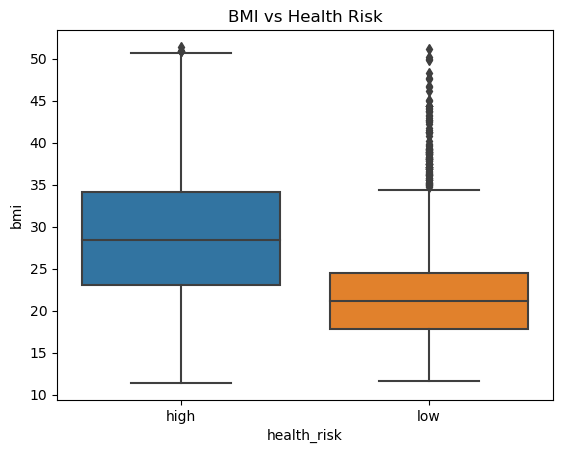

In [60]:
sns.boxplot(x='health_risk', y='bmi', data=df)
plt.title('BMI vs Health Risk')
plt.show()


### Multivariate Analysis

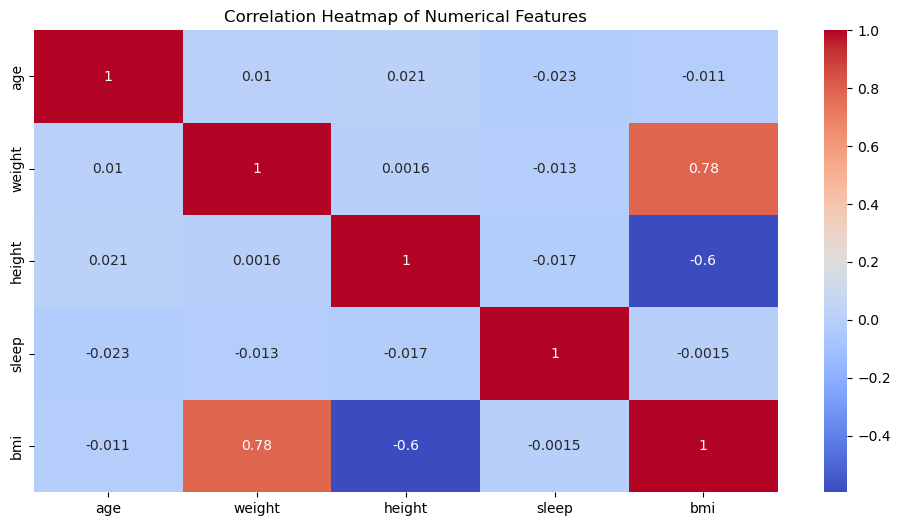

In [61]:
plt.figure(figsize=(12,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Exploratory Data Analysis (EDA) – Key Insights

####  Correlation Analysis (Numerical Features)
- BMI has a **strong positive correlation** with weight (**0.78**), indicating heavier individuals tend to have higher BMI values.
- BMI shows a **moderate negative correlation** with height (**-0.6**), which is expected since taller individuals may have lower BMI even with similar weight.
- Age, sleep duration, and height have **very weak or no correlation** with other features, suggesting they contribute **unique** information.
- No evidence of harmful multicollinearity among predictors.

*Conclusion:* BMI is a highly informative variable for health-risk prediction.

---

####  Health Risk Distribution
- The dataset is **slightly imbalanced**:
  - **High Risk:** ~3500 samples  
  - **Low Risk:** ~1500 samples  
- The majority of individuals fall into the **High Risk** category.



---

####  BMI vs Health Risk
- Individuals labeled **High Risk** have **higher median BMI** and a **wider spread** in BMI distribution.
- Low-risk individuals show **consistently lower BMI values** with fewer extreme outliers.

 *Conclusion:* Higher BMI is strongly associated with increased health risk — a medically meaningful finding.

---

#### BMI vs Age (Colored by Health Risk)
- Low-risk individuals are mostly clustered at **younger ages** (early 20s to mid-40s) with **lower BMI**.
- High-risk category covers a **wider age range** and a **broader BMI spread**, including obese categories.

 *Implication:* Both **age** and **BMI** serve as meaningful health predictors, especially when combined.

---

#### Outlier Detection (BMI)
- Based on the IQR method, BMI outlier boundaries are:
  - **Lower limit:** 2.15  
  - **Upper limit:** 50.55  
- Only **6 outliers** detected out of 5,000 records.

 *Insight:*  
The dataset is **clean** with minimal extreme BMI values.  
Outliers can be retained because:
- They are realistically possible in health scenarios (extreme obesity)
- They may contain **critical signals** for high-risk detection

---

### EDA Summary

- BMI is the **most influential** lifestyle-related feature with strong variance across health risk groups.
- Slight class imbalance requires **balanced modeling strategy**.
- No multicollinearity issues — all features are suitable for Machine Learning.


#### Feature Engineering

In [62]:
binary_cols = ['smoking', 'alcohol', 'married']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [63]:
cat_cols = ['exercise', 'sugar_intake', 'profession']

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [64]:
le = LabelEncoder()
df['health_risk'] = le.fit_transform(df['health_risk'])



###  Feature Encoding Summary

To prepare the dataset for Machine Learning model training, multiple encoding techniques were applied:

####  Binary Feature Encoding

- Features such as **smoking**, **alcohol consumption**, and **marital status** were mapped to **0 (No)** and **1 (Yes)**.
- This allows Logistic Regression to interpret these binary lifestyle choices numerically.


---

####  One-Hot Encoding for Categorical Variables
- Multi-class variables including **exercise level**, **sugar intake**, and **profession** were transformed using **One-Hot Encoding**.


---

####  Target Variable Encoding

- The output variable **health_risk** (High vs. Low) was **Label Encoded** into numeric form.
- Required by Logistic Regression for binary classification.


---

###  Encoding Summary Table

| Feature Type | Columns | Encoding Applied | Purpose |
|-------------|---------|----------------|--------|
| Binary | smoking, alcohol, married | 0/1 Encoding | Interpret simple yes/no lifestyle factors |
| Categorical | exercise, sugar_intake, profession | One-Hot Encoding | Avoids false ordinal relationships |
| Target | health_risk | Label Encoding | Enables classification modeling |



### Model Development & Training

In [72]:
X = df.drop('health_risk', axis=1)
y = df['health_risk']

# 1. Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scale using only training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 4. Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       698
           1       0.84      0.79      0.82       302

    accuracy                           0.89      1000
   macro avg       0.88      0.87      0.87      1000
weighted avg       0.89      0.89      0.89      1000



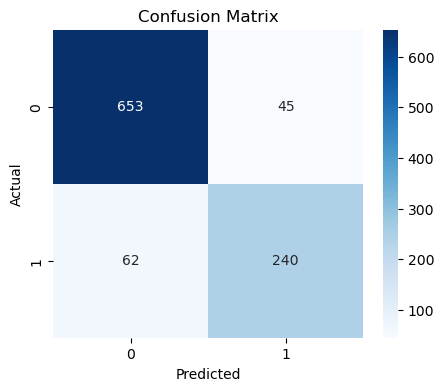

In [73]:
# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Evaluation Interpretation

#### Accuracy
- Model achieved 89.3% accuracy on the test set
- Most predictions are correct and reliable

#### High-Risk Class Interpretation
- High precision and recall
- Model correctly identifies most high-risk individuals
- Very few high-risk cases are missed

#### Low-Risk Class Interpretation
- Slightly lower precision and recall compared to high-risk class
- Some low-risk individuals are classified as high-risk
- Acceptable in healthcare to ensure safety

#### Overall Summary
- Model is effective in separating high and low health-risk groups
- Suitable for preventive healthcare decision-support


In [74]:
feature_names = X.columns  # X before scaling, same order as X_scaled
coef_df = pd.DataFrame(log_reg.coef_.T, index=feature_names)

In [75]:
if coef_df.shape[1] == 1:
    coef_df.columns = ['health_risk_coef']
else:
    # For multi-class logistic regression
    coef_df.columns = [f'class_{c}_coef' for c in range(coef_df.shape[1])]

print("\n=== Model Coefficients ===")
print(coef_df.sort_values(by=coef_df.columns[0], ascending=False).head(10))


=== Model Coefficients ===
                          health_risk_coef
sugar_intake_medium               1.241860
sugar_intake_low                  1.121432
sleep                             0.807408
height                            0.730423
profession_teacher                0.028020
married                           0.027315
profession_office_worker          0.003637
profession_student               -0.008435
profession_farmer                -0.021311
exercise_medium                  -0.022837


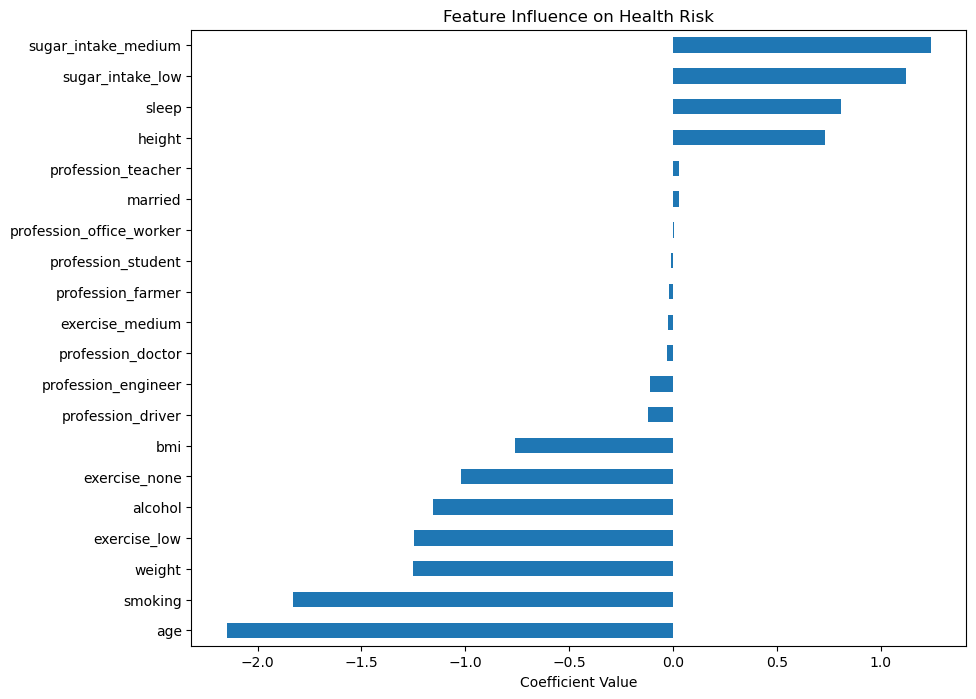

In [76]:
coef = log_reg.coef_[0]  # class 0 vs others (example)
feature_coef = pd.Series(coef, index=X.columns)
feature_coef.sort_values().plot(kind='barh', figsize=(10,8))
plt.title("Feature Influence on Health Risk")
plt.xlabel("Coefficient Value")
plt.show()


### Feature Influence Interpretation
- Lower sugar intake, better sleep, and taller height are linked with lower health risk.
- Smoking, higher age, higher BMI, and alcohol consumption increase health risk.
- Lifestyle factors have stronger influence on health risk than profession.


##### data set Reference 
https://www.kaggle.com/datasets/miadul/lifestyle-and-health-risk-prediction/data

# Thank You for Your Attention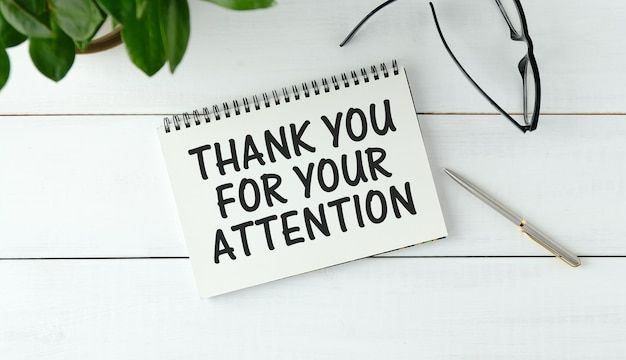